In [1]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
ply_point_cloud = o3d.data.PLYPointCloud()
# /home/rizo/inno/cv/structure-from-motion/results/fountain-NUCES/point-clouds/cloud_0.ply
pcd = o3d.io.read_point_cloud("/home/rizo/inno/cv/structure-from-motion/results/cropped/point-clouds/cloud_2_view.ply")
print(pcd)
print(np.asarray(pcd.points))

PointCloud with 207 points.
[[-2.0342018   1.88661048  7.35065302]
 [-1.48347518  1.12958468  8.61199604]
 [-1.31627183  1.12292818  8.80107985]
 [-2.33292826  1.29807671  7.6594028 ]
 [-1.48347518  1.12958468  8.61199604]
 [-2.25825601  1.27977274  7.74702808]
 [-2.20196979  1.82172694  7.27532506]
 [-2.18457381  1.85694084  7.27665628]
 [-1.87912563  1.94994712  7.41901677]
 [-1.51889381  1.18224691  8.50615831]
 [-2.17210762  1.24937464  7.8243577 ]
 [-1.15752573  1.02752166  9.13761192]
 [-2.65902349  1.40258979  7.36088351]
 [-1.45616569  1.18102813  8.57601175]
 [-2.54415178  1.12799985  7.97174369]
 [-2.48382194  1.7660211   7.22979019]
 [-2.69215354  1.43058615  7.38549278]
 [-2.31181705  1.29221296  7.66920682]
 [-2.73960513  1.71169556  7.20029541]
 [-1.97995134  1.89760968  7.39573439]
 [-2.49798499  1.74691949  7.22515748]
 [-2.61548629  1.71959427  7.20300084]
 [-1.14497375  1.17076442  8.93579369]
 [-1.34089008 -1.27627557  9.30363275]
 [-1.22469944 -1.29041142  9.1831703

In [3]:
o3d.visualization.draw_plotly([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

In [1]:
from transformers import AutoImageProcessor, SuperPointForKeypointDetection
import torch
import cv2
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
processor = AutoImageProcessor.from_pretrained("magic-leap-community/superpoint")
model = SuperPointForKeypointDetection.from_pretrained("magic-leap-community/superpoint")

In [3]:
img = cv2.imread("/home/rizo/inno/cv/structure-from-motion/image2.png")
img = img[:, :, ::-1]  # Convert BGR to RGB

In [4]:
# Modify the processor to avoid resizing
processor.do_resize = False  # Disable resizing
# Optionally, you can inspect or override the size parameter:
# processor.size = None  # This ensures no resizing is applied


In [5]:
# Process image using SuperPoint
inputs = processor(img, return_tensors="pt")
outputs = model(**inputs)

# Extract keypoints and descriptors
kps = outputs.keypoints[0].detach().numpy()  # Keypoints
desc = outputs.descriptors[0].detach().numpy()  # Descriptors

In [6]:
image_bgr = img.copy()
for kp in kps:
    x, y = kp[0], kp[1]
    cv2.circle(image_bgr, (int(x), int(y)), radius=3, color=(255, 0, 0), thickness=-1)

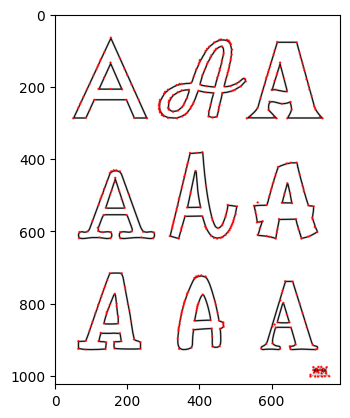

In [9]:
plt.imshow(image_bgr)